# Import essential python libraries


In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [3]:
#basics
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import randint, uniform, loguniform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#feature engineering
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans

#preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#pipeline architecture
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf

#Evaluation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

#Hyperparameter tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
from sklearn.model_selection import RandomizedSearchCV, HalvingRandomSearchCV

# Loading the data

In [4]:
original_df = pd.read_csv("/content/drive/MyDrive/ProjectData/equipment_failure/dataset.csv")

In [136]:
df_exp = original_df.copy()
df_pipe = original_df.copy()

In [5]:
original_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [6]:
original_df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

There are no missing values

# Exploratory Data Analysis

In [18]:
df_exp.duplicated().sum()

np.int64(0)

There are no duplicated values

In [13]:
numerical_columns = df_exp.select_dtypes([int, float]).columns.tolist()
categorical_columns = df_exp.select_dtypes([object]).columns.tolist()

In [14]:
numerical_columns

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [15]:
categorical_columns

['Product ID', 'Type']

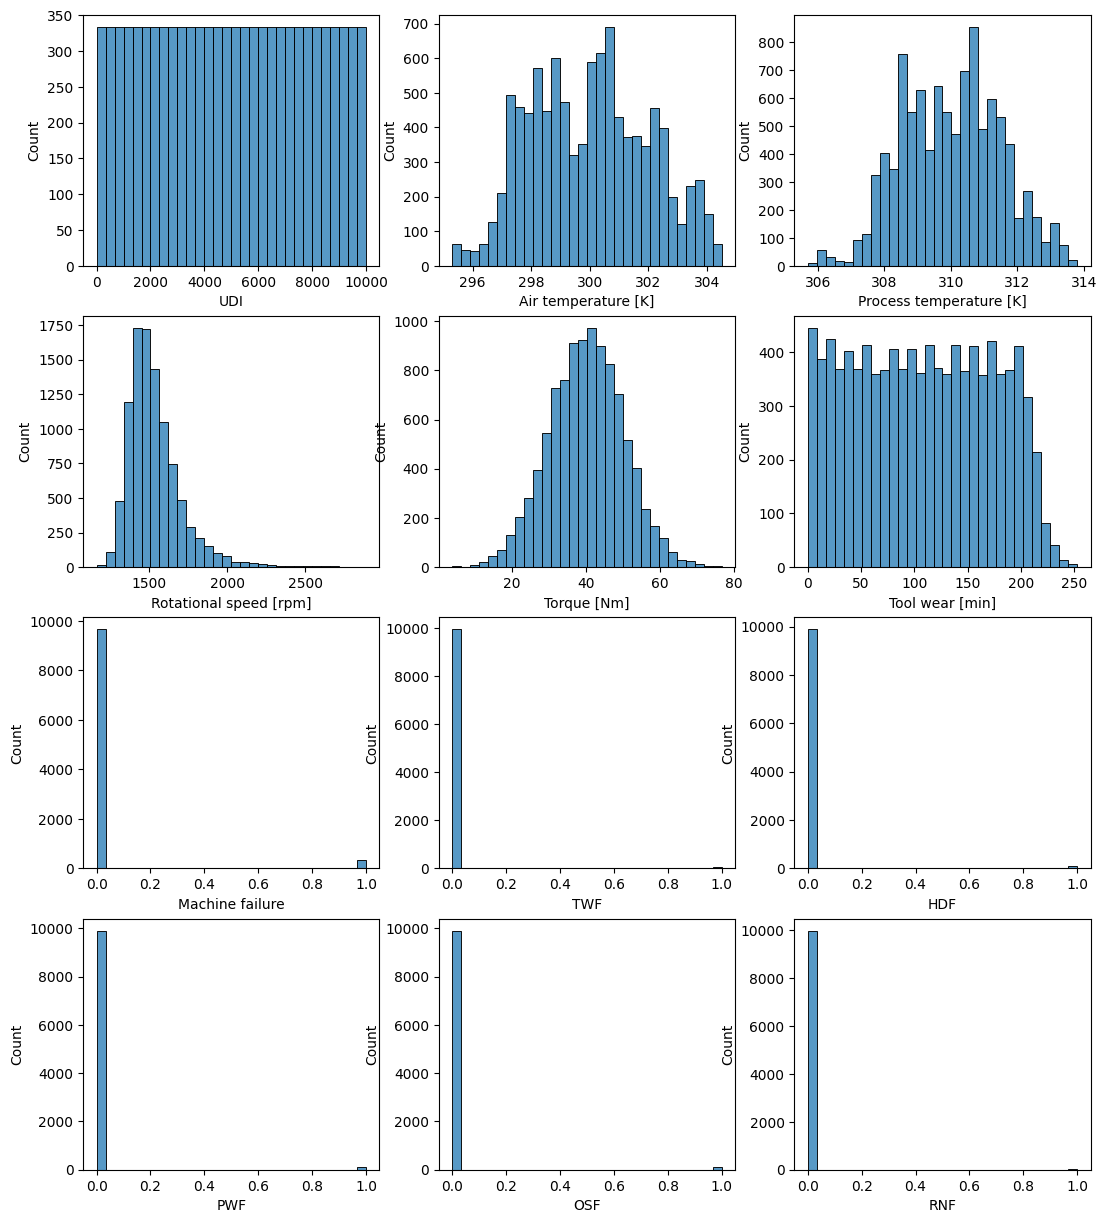

In [21]:
fig, ax = plt.subplots(4, 3, figsize=(13, 15))
for var, subplot in zip(numerical_columns, ax.flatten()):
    sns.histplot(x=var, data=df_exp, ax=subplot, bins=30)
plt.show()

Here Rotational speed feature is rightly skewed.

In most of the cases there is no machine failure

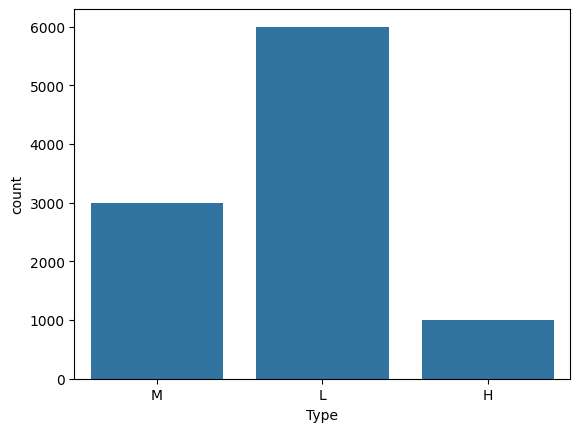

In [27]:
fig = figsize=(13, 15)
sns.countplot(x='Type', data=df_exp)
plt.show()

product qulity is mostly low, then medium then high

In [137]:
def split_product_id(X):
    df = X.copy()
    id = df['Product ID']

    id_number = []

    for i in id:
        result = i[1:]
        id_number.append(result)

    id_number = list(map(int, id_number))

    df['Product ID Num'] = id_number

    df.drop(columns=['Product ID'], inplace= True)

    return df


df_exp = split_product_id(df_exp)

In [138]:
df_exp

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Product ID Num
0,1,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,14860
1,2,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,47181
2,3,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,47182
3,4,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,47183
4,5,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,47184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,24855
9996,9997,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,39410
9997,9998,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,24857
9998,9999,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,39412


<Axes: xlabel='UDI', ylabel='Product ID Num'>

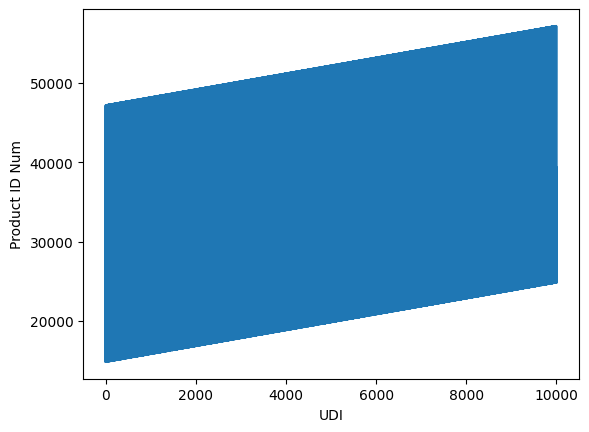

In [139]:
fig = figsize=(30, 30)
sns.lineplot(x = 'UDI', y = 'Product ID Num', data = df_exp)

Product ID Number gives no such information, we will drop it

In [140]:
types = {'H':2, 'M':1, 'L':0}

df_exp['Type Encoded'] = df_exp['Type'].map(types)

In [141]:
df_exp

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Product ID Num,Type Encoded
0,1,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,14860,1
1,2,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,47181,0
2,3,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,47182,0
3,4,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,47183,0
4,5,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,47184,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,24855,1
9996,9997,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,39410,2
9997,9998,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,24857,1
9998,9999,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,39412,2


since we don't need UDI for now, we will drop it

In [142]:
df_exp.drop(columns=['UDI', 'Product ID Num', 'Type'], inplace=True)

# Prepare the data for Machine Learning Algorithms

In [143]:
df_exp

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type Encoded
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,2
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,2


In [144]:
failure_cols = ['TWF',	'HDF',	'PWF', 'OSF',	'RNF']
df_exp['failure_type'] = df_exp[failure_cols].idxmax(axis=1).str.replace('fail_type_', '')

# Step 2: Drop one-hot columns
df_exp = df_exp.drop(columns=failure_cols)

print(df_exp)

      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  Machine failure  Type Encod

In [145]:
df_exp

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type Encoded,failure_type
0,298.1,308.6,1551,42.8,0,0,1,TWF
1,298.2,308.7,1408,46.3,3,0,0,TWF
2,298.1,308.5,1498,49.4,5,0,0,TWF
3,298.2,308.6,1433,39.5,7,0,0,TWF
4,298.2,308.7,1408,40.0,9,0,0,TWF
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,1,TWF
9996,298.9,308.4,1632,31.8,17,0,2,TWF
9997,299.0,308.6,1645,33.4,22,0,1,TWF
9998,299.0,308.7,1408,48.5,25,0,2,TWF


In [146]:
types = {'TWF':0,	'HDF':1,	'PWF':2, 'OSF':3,	'RNF':4}

df_exp['failure_type'] = df_exp['failure_type'].map(types)

In [176]:
numerical_columns = df_exp.select_dtypes([int, float]).columns.tolist()

<Axes: >

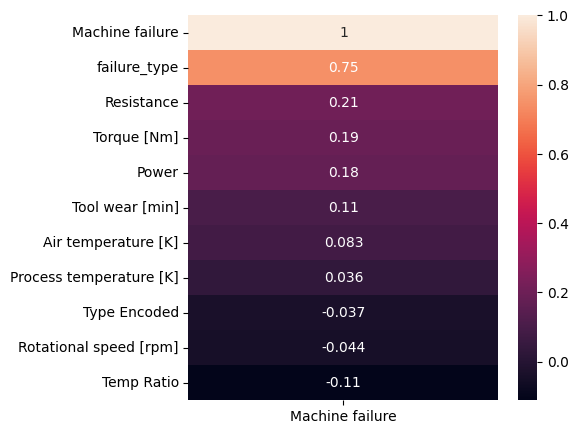

In [187]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_exp[numerical_columns].corr()[['Machine failure']].sort_values(by= "Machine failure", ascending=False), annot=True)

<Axes: >

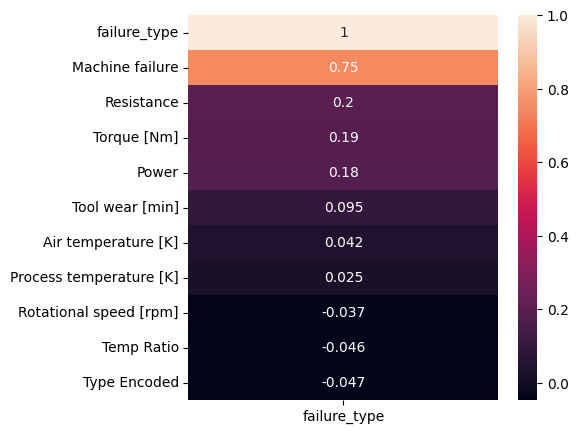

In [189]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_exp[numerical_columns].corr()[['failure_type']].sort_values(by= 'failure_type', ascending=False), annot=True)

temp_ratio = ProcessTemp / AirTemp

power = Torque * RotationalSpeed

resistance = Torque / RotationalSpeed

In [190]:
df_exp['Temp Ratio'] = df_exp['Process temperature [K]'] / df_exp['Air temperature [K]']
df_exp['Power'] = df_exp['Torque [Nm]'] * df_exp['Rotational speed [rpm]']
df_exp['Resistance'] =  df_exp['Torque [Nm]'] / df_exp['Rotational speed [rpm]']

<Axes: >

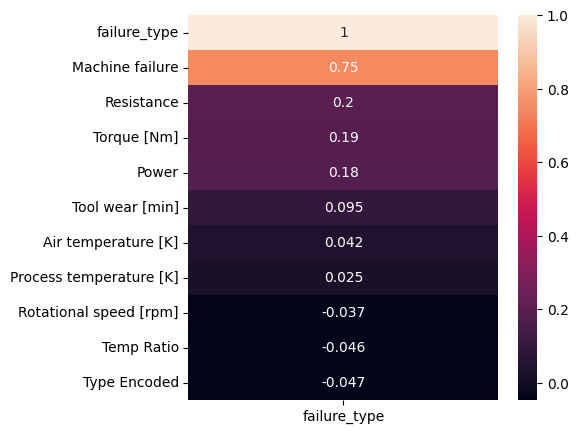

In [191]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_exp[numerical_columns].corr()[['failure_type']].sort_values(by= 'failure_type', ascending=False), annot=True)

<Axes: >

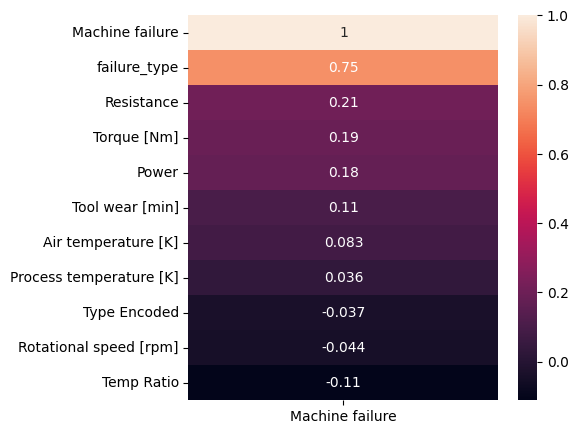

In [192]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_exp[numerical_columns].corr()[['Machine failure']].sort_values(by= "Machine failure", ascending=False), annot=True)

Resistance Helped us a lot

In [193]:
target_columns = ['Machine failure',	'failure_type']

y = df_exp[target_columns]
X = df_exp.drop(columns=target_columns)


In [194]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type Encoded,Temp Ratio,Power,Resistance
0,298.1,308.6,1551,42.8,0,1,1.035223,66382.8,0.027595
1,298.2,308.7,1408,46.3,3,0,1.035211,65190.4,0.032884
2,298.1,308.5,1498,49.4,5,0,1.034888,74001.2,0.032977
3,298.2,308.6,1433,39.5,7,0,1.034876,56603.5,0.027565
4,298.2,308.7,1408,40.0,9,0,1.035211,56320.0,0.028409
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,1,1.032129,47318.0,0.018392
9996,298.9,308.4,1632,31.8,17,2,1.031783,51897.6,0.019485
9997,299.0,308.6,1645,33.4,22,1,1.032107,54943.0,0.020304
9998,299.0,308.7,1408,48.5,25,2,1.032441,68288.0,0.034446


In [195]:
y['failure_type'].value_counts()

,count
failure_type,
0,9698
1,115
2,91
3,78
4,18


## Normalizing Data

In [196]:
rotational_speed = np.log1p(X['Rotational speed [rpm]'])

In [81]:
# rotational_speed = np.log10(rotational_speed)

In [197]:
rotational_speed = rotational_speed.to_frame()

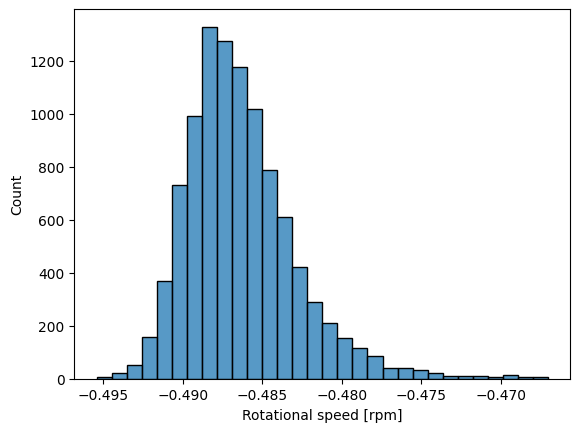

In [82]:
# fig = figsize=(13, 15)
# sns.histplot(x='Rotational speed [rpm]', data=rotational_speed, bins=30)
# plt.show()

In [198]:
X['Rotational speed [rpm]'] = rotational_speed

In [154]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type Encoded
0,298.1,308.6,7.347300,42.8,0,1
1,298.2,308.7,7.250636,46.3,3,0
2,298.1,308.5,7.312553,49.4,5,0
3,298.2,308.6,7.268223,39.5,7,0
4,298.2,308.7,7.250636,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,7.380879,29.5,14,1
9996,298.9,308.4,7.398174,31.8,17,2
9997,299.0,308.6,7.406103,33.4,22,1
9998,299.0,308.7,7.250636,48.5,25,2


In [ ]:
df_pipe

In [238]:
target_columns = ['Machine failure',	'TWF', 'HDF',	'PWF',	'OSF',	'RNF']

y_pipe = df_pipe[target_columns]
X_pipe = df_pipe.drop(columns=target_columns)

In [241]:
class TransformXFeatures(BaseEstimator, TransformerMixin):
  def __init__(self):
        pass
  def fit(self, X, y=None):
      self.n_features_in_ = X.shape[1]
      return self
  def transform(self, X):
      check_is_fitted(self)

      assert X.shape[1] == self.n_features_in_

      df = X.copy()

      types = {'H':2, 'M':1, 'L':0}

      df['Type Encoded'] = df['Type'].map(types)

      df['Temp Ratio'] = df['Process temperature [K]'] / df['Air temperature [K]']
      df['Power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
      df['Resistance'] =  df['Torque [Nm]'] / df['Rotational speed [rpm]']


      df.drop(columns=['UDI', 'Product ID', 'Type'], inplace=True)


      return df



In [251]:
class TransformYFeatures(BaseEstimator, TransformerMixin):
  def __init__(self):
        pass
  def fit(self, X, y=None):
      self.n_features_in_ = X.shape[1]
      return self
  def transform(self, X):
      check_is_fitted(self)

      assert X.shape[1] == self.n_features_in_

      df = X.copy()


      failure_cols = ['TWF',	'HDF',	'PWF', 'OSF',	'RNF']
      df['failure_type'] = df[failure_cols].idxmax(axis=1).str.replace('fail_type_', '')
      # Step 2: Drop one-hot columns
      df = df.drop(columns=failure_cols)
      types = {'TWF':0,	'HDF':1,	'PWF':2, 'OSF':3,	'RNF':4}
      df['failure_type'] = df['failure_type'].map(types)


      return df.values



In [338]:
def safe_log_transform(x):
    return np.log(np.clip(x, a_min=1e-5, a_max=None))

def safe_exp_transform(x):
    return np.exp(x)

log_transformer = FunctionTransformer(func=safe_log_transform, inverse_func=safe_exp_transform)
txf = TransformXFeatures()

log_ct = ColumnTransformer(transformers=[
    ('log_speed', log_transformer, ['Rotational speed [rpm]'])
], remainder='passthrough')


X_pipeline = Pipeline([
        ('txt', txf),
        ('log_ct', log_ct),
        ('scale', StandardScaler())
    ])


In [339]:
transformed_X = X_pipeline.fit_transform(X_pipe)

In [340]:
tyf = TransformYFeatures()

y_pipeline = Pipeline([
    ('tyf', tyf)
])

transformed_y = y_pipeline.fit_transform(y_pipe)

# Modeling

In [256]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, transformed_y, test_size = 0.2, stratify = y['Machine failure'])

In [260]:
from sklearn.multioutput import MultiOutputClassifier

logr = Pipeline(steps=[
    ('clf', MultiOutputClassifier(LogisticRegression(random_state=42)))
])

svc = Pipeline(steps=[
    ('clf', MultiOutputClassifier(SVC(random_state=42)))
])

dtc = Pipeline(steps=[
    ('clf', MultiOutputClassifier(DecisionTreeClassifier(random_state=42)))
])

rfc = Pipeline(steps=[
    ('clf', MultiOutputClassifier(RandomForestClassifier(random_state=42)))
])

etc = Pipeline(steps=[
    ('clf', MultiOutputClassifier(ExtraTreesClassifier(random_state=42)))
])

abc = Pipeline(steps=[
    ('clf', MultiOutputClassifier(AdaBoostClassifier(random_state=42)))
])

gbc = Pipeline(steps=[
    ('clf', MultiOutputClassifier(GradientBoostingClassifier(random_state=42)))
])

hgbc = Pipeline(steps=[
    ('clf', MultiOutputClassifier(HistGradientBoostingClassifier(random_state=42)))
])

xgbc = Pipeline(steps=[
    ('clf', MultiOutputClassifier(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')))
])

cbc = Pipeline(steps=[
    ('clf', MultiOutputClassifier(CatBoostClassifier(verbose=0, random_state=42)))
])

lgbmc = Pipeline(steps=[
    ('clf', MultiOutputClassifier(LGBMClassifier(random_state=42)))
])

In [263]:
models = {'logr':logr, 'svc':svc, 'dtc': dtc, 'rfc': rfc, 'etc': etc,
          'abc' : abc, 'gbc': gbc, 'xgbc': xgbc}

In [264]:
trained_models = [model.fit(transformed_X, transformed_y) for model in models.values()]
scores = {name:model.score(transformed_X, transformed_y) for name, model in models.items()}

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:29:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:29:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [265]:
scores

{'logr': np.float64(0.9663),
 'svc': np.float64(0.9775),
 'dtc': np.float64(1.0),
 'rfc': np.float64(1.0),
 'etc': np.float64(1.0),
 'abc': np.float64(0.9696),
 'gbc': np.float64(0.9937),
 'xgbc': np.float64(1.0)}

In [270]:
def multioutput_accuracy(y_true, y_pred):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    # average accuracy across output columns
    return np.mean([accuracy_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

multi_scorer = make_scorer(multioutput_accuracy)

# now use in cross_val_score
cv_scores = {
    name: cross_val_score(model, transformed_X, transformed_y, cv=3, scoring=multi_scorer).mean()
    for name, model in models.items()
}

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:37:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:37:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:37:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [271]:
cv_scores

{'logr': np.float64(0.9731992245415304),
 'svc': np.float64(0.9729490645525259),
 'dtc': np.float64(0.9748493445625307),
 'rfc': np.float64(0.9801991296910136),
 'etc': np.float64(0.9782490246625142),
 'abc': np.float64(0.9758489346235164),
 'gbc': np.float64(0.980149139689014),
 'xgbc': np.float64(0.9780491396470182)}

rfc performs the best

# Building final model

In [302]:
X_train, X_test, y_train, y_test= train_test_split(X_pipe, y_pipe, test_size = 0.2, stratify = y['Machine failure'])

In [341]:
from sklearn.base import BaseEstimator, TransformerMixin, clone

class XYPipeline(BaseEstimator):
    def __init__(self, X_pipeline, y_pipeline, model):
        self.X_pipeline = X_pipeline
        self.y_pipeline = y_pipeline
        self.model = model

    def fit(self, X, y):
        # Fit and transform both X and y
        X_transformed = self.X_pipeline.fit_transform(X)
        y_transformed = self.y_pipeline.fit_transform(y)
        self.model.fit(X_transformed, y_transformed)
        return self

    def predict(self, X):
        X_transformed = self.X_pipeline.transform(X)
        y_pred = self.model.predict(X_transformed)

        if hasattr(self.y_pipeline, "inverse_transform"):
            try:
                return self.y_pipeline.inverse_transform(y_pred)
            except Exception:
                return y_pred
        else:
            return y_pred

        return self.y_pipeline.inverse_transform(y_pred)

In [342]:
final_pipeline = XYPipeline(X_pipeline, y_pipeline, rfc)
final_pipeline.fit(X_train, y_train)
y_preds = final_pipeline.predict(X_test)

In [343]:
y_preds

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [344]:
y_test_transformed = y_pipeline.fit_transform(y_test)

In [345]:
acc_per_label = [accuracy_score(y_test_transformed[:, i], y_preds[:, i]) for i in range(y_test_transformed.shape[1])]

# Precision, recall, F1 per label (binary or multiclass)
prec_per_label = [precision_score(y_test_transformed[:, i], y_preds[:, i], average='weighted', zero_division=0)
                  for i in range(y_test_transformed.shape[1])]
rec_per_label  = [recall_score(y_test_transformed[:, i], y_preds[:, i], average='weighted', zero_division=0)
                  for i in range(y_test_transformed.shape[1])]
f1_per_label   = [f1_score(y_test_transformed[:, i], y_preds[:, i], average='weighted', zero_division=0)
                  for i in range(y_test_transformed.shape[1])]

In [321]:
acc_per_label

[0.992, 0.9955]

In [320]:
prec_per_label

[0.9920657084188912, 0.9938780248528449]

In [322]:
rec_per_label

[0.992, 0.9955]

In [323]:
f1_per_label

[0.9914831615120275, 0.9945987349051177]

In [346]:
X_test

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4730,4731,L51910,L,303.3,311.7,1508,35.5,217
199,200,L47379,L,298.4,308.6,1433,47.1,101
2273,2274,L49453,L,299.3,308.5,1589,32.7,74
6055,6056,L53235,L,300.7,310.8,1475,42.0,147
9982,9983,M24842,M,298.7,308.4,1507,45.7,192
...,...,...,...,...,...,...,...,...
3920,3921,L51100,L,302.6,311.5,1885,27.5,147
315,316,L47495,L,297.9,308.4,1646,40.6,175
6463,6464,H35877,H,300.5,310.0,1358,60.4,102
8822,8823,L56002,L,297.4,308.8,1462,49.7,132


In [347]:
X_test.iloc[0, :]

,4730
UDI,4731
Product ID,L51910
Type,L
Air temperature [K],303.3
Process temperature [K],311.7
Rotational speed [rpm],1508
Torque [Nm],35.5
Tool wear [min],217


In [348]:
import numpy as np

def get_fault_info(y_pred):

    fault_map = {
        0: 'TWF',  # Tool Wear Failure
        1: 'HDF',  # Heat Dissipation Failure
        2: 'PWF',  # Power Failure
        3: 'OSF',  # Overstrain Failure
        4: 'RNF'   # Random Failure
    }

    fault_status = (y_pred.sum(axis=1) > 0).astype(int)

    fault_types = []
    for row in y_pred:
        indices = np.where(row == 1)[0]
        if len(indices) == 0:
            fault_types.append('No Failure')
        else:
            fault_types.append(', '.join(fault_map[i] for i in indices))

    return fault_status, fault_types


In [349]:
output = final_pipeline.predict(X_test.iloc[[0], :])

In [350]:
get_fault_info(output)

(array([0]), ['No Failure'])

In [358]:
import sklearn
print(sklearn.__version__)

1.6.1


In [359]:
X_test

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4730,4731,L51910,L,303.3,311.7,1508,35.5,217
199,200,L47379,L,298.4,308.6,1433,47.1,101
2273,2274,L49453,L,299.3,308.5,1589,32.7,74
6055,6056,L53235,L,300.7,310.8,1475,42.0,147
9982,9983,M24842,M,298.7,308.4,1507,45.7,192
...,...,...,...,...,...,...,...,...
3920,3921,L51100,L,302.6,311.5,1885,27.5,147
315,316,L47495,L,297.9,308.4,1646,40.6,175
6463,6464,H35877,H,300.5,310.0,1358,60.4,102
8822,8823,L56002,L,297.4,308.8,1462,49.7,132
